The file "studentInfo.csv" contains information about students' enrollment and deregistration dates. If a student is not yet deregistered, the value of deregistration date is None. The dates are in the following format dd/mm/yyyy.

Read the file into a panda dataframe.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("studentInfo.csv")

#with delimiter
#data = pd.read_csv("studentInfo.csv", sep=';')

Show the first rows to verify that this worked well.

In [117]:
data

,studentnummer;inschrijfdatum;uitschrijfdatum
0,r012345;11/09/2023;None
1,r124589;10/05/2023;01/12/2022
2,r457899;10/10/2023;24/31/2024
3,r012345;11/09/2023;22/12/2023
4,r024589;10/18/2023;100/12/2023
5,r957899;10/10/2023;None
6,r112345;21/09/2023;01/01/2024
7,r124589;10/08/2023;01/12/2023
8,r457899;10/10/2023;24/01/2024
9,r012345;11/09/2023;22/12/2023


Delete all rows with a non-valid date in the "deregistration date" column (also None is obviously a non-valid date). 
Show the first rows again to check if this was successful

In [118]:
import pandas as pd
data[['studentnummer', 'inschrijfdatum', 'uitschrijfdatum']] = data['studentnummer;inschrijfdatum;uitschrijfdatum'].str.split(';', expand=True)

# Drop the original column
data = data.drop(columns=['studentnummer;inschrijfdatum;uitschrijfdatum'])

# Remove the rows where 'uitschrijfdatum' is NaT
data = data.dropna(subset=['uitschrijfdatum'])

# Show the first rows
data

,studentnummer,inschrijfdatum,uitschrijfdatum
0,r012345,11/09/2023,None
1,r124589,10/05/2023,01/12/2022
2,r457899,10/10/2023,24/31/2024
3,r012345,11/09/2023,22/12/2023
4,r024589,10/18/2023,100/12/2023
5,r957899,10/10/2023,None
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024
9,r012345,11/09/2023,22/12/2023


Delete all rows with a non-valid date in the column "enrollment date".

In [123]:
# Convert the 'uitschrijfdatum' column to datetime, invalid parsing will be set as NaT

# ok but this is weird, this one makes no sense...
# Because else I would be getting dates like 100/12/... LIKE WTF????
# data['uitschrijfdatum'] = pd.to_datetime(data['uitschrijfdatum'], format='%d/%m/%Y', errors='coerce')

# Remove the rows where 'uitschrijfdatum' is NaT
data = data.dropna(subset=['uitschrijfdatum'])

# this is also commented out, just like above. I got no clue, UCLL MOMENT XD
# Convert the datetime objects back to strings in the 'mm/dd/yyyy' format
# data['uitschrijfdatum'] = data['uitschrijfdatum'].dt.strftime('%m/%d/%Y')

# Show the first rows
data

,studentnummer,inschrijfdatum,uitschrijfdatum,number of days
3,r012345,2023-09-11,2023-12-22,102.0
6,r112345,2023-09-21,2024-01-01,102.0
7,r124589,2023-08-10,2023-12-01,113.0
8,r457899,2023-10-10,2024-01-24,106.0
9,r012345,2023-09-11,2023-12-22,102.0
10,r024589,2023-08-15,2023-12-01,108.0
11,r957899,2023-10-10,2024-01-24,106.0


Create a new column "number of days" that contains the number of days between enrollment and deregistration dates.

In [124]:
# Convert the 'inschrijfdatum' and 'uitschrijfdatum' columns to datetime
data['inschrijfdatum'] = pd.to_datetime(data['inschrijfdatum'], format='%d/%m/%Y', errors='coerce')
data['uitschrijfdatum'] = pd.to_datetime(data['uitschrijfdatum'], format='%d/%m/%Y', errors='coerce')

# Calculate the number of days between 'inschrijfdatum' and 'uitschrijfdatum'
data['number of days'] = (data['uitschrijfdatum'] - data['inschrijfdatum']).dt.days

# Show the DataFrame
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum,number of days
3,r012345,2023-09-11,2023-12-22,102
6,r112345,2023-09-21,2024-01-01,102
7,r124589,2023-08-10,2023-12-01,113
8,r457899,2023-10-10,2024-01-24,106
9,r012345,2023-09-11,2023-12-22,102


Delete all rows for which the column "number of days" has a negative value.


In [121]:
# Remove the rows where 'number of days' is negative
data = data[data['number of days'] >= 0]

# Show the DataFrame
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum,number of days
3,r012345,2023-09-11,2023-12-22,102.0
6,r112345,2023-09-21,2024-01-01,102.0
7,r124589,2023-08-10,2023-12-01,113.0
8,r457899,2023-10-10,2024-01-24,106.0
9,r012345,2023-09-11,2023-12-22,102.0


Provide a visual overview in the form of a histogram of the number of students enrolled for the same number of days.
Example: 

![output.png contains an image of the expected output. A histogram is shown with "aantal dagen ingeschreven" on the x-axis and "aantal studenten" on the y-axis.](output.png)

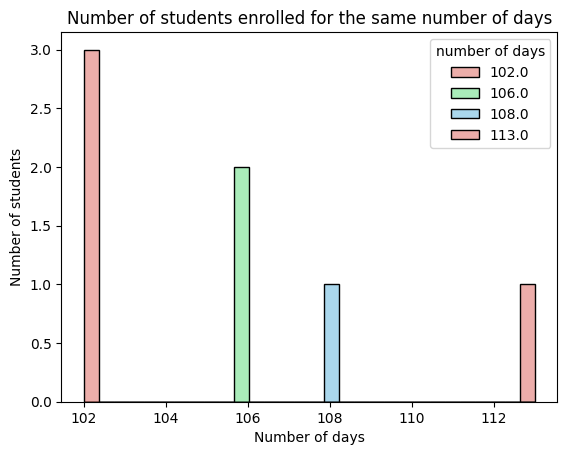

In [122]:
# Create a histogram of the 'number of days' column
sns.histplot(data=data, x='number of days', bins=30, kde=False, hue='number of days', palette='hls')

# Set the title and labels
plt.title('Number of students enrolled for the same number of days')
plt.xlabel('Number of days')
plt.ylabel('Number of students')

# Show the plot
plt.show()